# COM4509/6509 Assignment 2024

Hello, this is the programming assignment for *Machine Learning and Adaptive Intelligence*. This is worth 50% of the module grade, the remaining 50% will be assessed via the formal exam.

**Deadline: 13th December 2024, 23:59**

Please submit well before the deadline as there may be delays in the submission. Submission will be via Blackboard.

There are 2 parts to this assignment, covering different portions of the course. Both parts are worth 50 marks to give a combined total of 100 marks. Both contain a set of questions which will ask you to implement various machine learning algorithms that are covered throughout the course. You will receive marks for the correctness of your implementations, text based responses to certain questions and the quality of your code. Each question indicates how many marks are available.

### Use of unfair means and Generative AI

For this assignment **you must not use code/text produced by generative AI, that is created using a prompt**. The 'autocomplete' feature in colab can still be used.

This is an individual assignment, while you may discuss this with your classmates, **please make sure you submit your own code**. You are allowed to use code from the labs as a basis of your submission.

The university's policy on the use of GenAI is on [this page](https://www.sheffield.ac.uk/study-skills/digital/generative-ai/assessment).

"Any form of unfair means is treated as a serious academic offence and action may be taken under the Discipline Regulations." (from the students Handbook).

### Assignment help

If you are stuck and unsure what you need to do then please ask either in the lectures, labs or on the discussion board. There is a limit to what help we can provide but where possible we will give general guidance with how to proceed.

We are happy for you to discuss the assignment with other students but your code and test answers **must** be your own.

### What to submit

- You need to submit a **pdf** of your notebook *and* the **notebook**. Please name them:

```
assignment_[username].ipynb
assignment_[username].pdf
```
replacing `[username]` with your username, e.g. `abc18de`.

- **Please execute the cells before your submission**, so we can see the results in the pdf. The best way to get a pdf is using Jupyter Notebook locally but if you are using Google Colab and are unable to download it to use Jupyter then you can use the Google Colab *file $\rightarrow$ print* to get a pdf copy.
- **Please do not upload** the data files used in this Notebook. We just want the python notebook *and the pdf*.

### Late submissions

We follow the department's guidelines about late submissions, Undergraduate [handbook link](https://sites.google.com/sheffield.ac.uk/comughandbook/your-study/assessment/late-submission). PGT [handbook link](https://sites.google.com/sheffield.ac.uk/compgtstudenthandbook/home/your-study/assessment/late-submission).


# Part 1: Tracking Bees

### Overview
This part of the assignment will cover lectures:
 - 1, Introduction to Machine Learning
 - 2, parts of End-to-End ML
 - 4, Linear regression

### Allowed libraries
For this part we are looking for you to demonstrate what you have learned in this module - the libraries needed are already imported in the code below - you shouldn't need to import any other library.

### Marks

There are 50 marks available for this half of the coursework (45 in the nine questions below, and 5 for code quality and clarity). The marks for code quality does not cover the correctness of your answers to each section but rather the style and clarity of your code. You should aim to avoid repetition of code, have clear but concise comments and appropriately named variables.

You'll get marks for correct code that does what is asked and for text based answers to particular points. We are not overly concerned with model performance but you should still aim to get the best results you can for your chosen approaches. You should make sure any figures are plotted properly with axis labels and figure legends.

# Imports and Datafiles

In [68]:
import urllib.request
import numpy as np
import matplotlib.pyplot as plt

urllib.request.urlretrieve('https://drive.usercontent.google.com/download?id=1XrXVkEfFtgA9VlU2rP4-gGdI_7-TmJ4k&export=download&authuser=0','bee_flightpaths.npy')
dataset = np.load('bee_flightpaths.npy',allow_pickle=True)

Nbases = 10 #number of bases per axis

# Part 1: Finding the path of the bee

In lectures, I briefly mentioned the problem of inferring the path of a bumblebee. For this half of the coursework you will be required to reconstruct the flight path of a series of bees!

The tracking system consists of four detectors in the landscape. Each one occasionally detects the bee and records its bearing (the direction the bee is in).

In the figure the detectors are marked as green circles, the true path of the bee is the red line. In this example the detectors record the direction of the bee at five times (0s, 0.9s, 1.8s, 2.7s, 3.6s). The blue lines indicate the bearing of the bee at each of those times.

![test](https://external-content.duckduckgo.com/iu/?u=https://drive.usercontent.google.com/download?id=1IIaTWlqDuUla6tmL2usinWcOs_aJknb7&export=download&authuser=0&confirm=t&uuid=ee31fadf-4593-468f-b759-6a418767006c&at=AENtkXYQ8DcCgp1c8l__xmzCyWQp:1730720770038)

*Flight path of the bee and the bearings from the detector from<br/>which it was observed -- notice we only get the bearing of the<br/>bee, we don't know how far away it is. Axes are in metres.*<br/><br/>

The task is to try to estimate the path of the bee, given those observations.

The dataset consists of 30 such flight paths (inside `dataset`). Each element e.g. `dataset[12]` is a flightpath dictionary containing:
 - `truepath`: An array of 100 points of the bee's flight over 30 seconds. This is an array $100 \times 3$. The first column is the time, the second and third the location (x,y) of the bee. For example:

```
 array([[  0.  , -43.11,  11.27],
       [  0.3 , -43.68,   9.49],
       [  0.61, -44.03,   7.69],
       [  0.91, -44.15,   5.88],
       [  1.21, -44.03,   4.07],
            :      :        :
```

 - `observations`: A $17 \times 5$ array of 17 observations. Each row consists of the time (column 0), the location of the detector (columns 1 and 2), and a unit vector facing in the direction of the bee (columns 3 and 4).

```
array([[  0.  , -15.  , -15.  ,  -0.73,   0.68],
       [  0.91,  15.  ,  15.  ,  -0.99,  -0.15],
       [  1.82, -15.  ,  15.  ,  -0.89,  -0.46],
       [  2.73,  15.  , -15.  ,  -0.98,   0.18],
       [  3.64, -15.  ,  15.  ,  -0.62,  -0.78],
       [  4.55,  15.  , -15.  ,  -1.  ,   0.02],
       [  5.45, -15.  , -15.  ,  -0.89,  -0.45],
           :     :       :         :       :
```

(as an example, the 2nd row is an observation at time 0.91s, from a detector at location [15,15], that saw the bee in the direction of [-0.99, -0.15]. One can see this is one of the observations in the figure above.

## Question 1: Plotting [3 marks]

First, plot the true flightpath of the bee in `dataset[1]`. Add a marker to the plot for the location at time zero.


Text(2, 2, 'Location at \n time = 0 \n second')

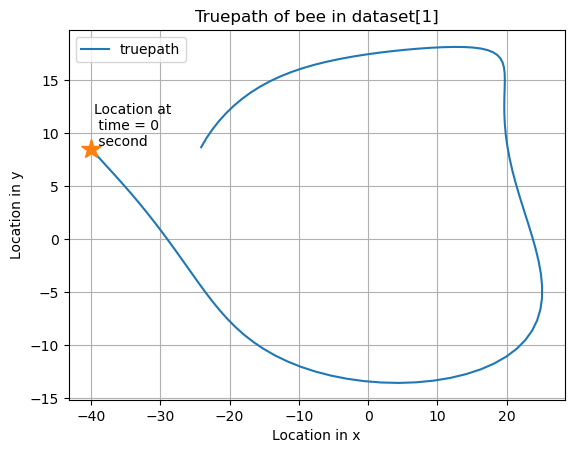

In [69]:
#Answer here

plt.plot(dataset[1]['truepath'][:,1],dataset[1]['truepath'][:,2],'-',label='truepath')
plt.plot(dataset[1]['truepath'][0][1] ,dataset[1]['truepath'][0][2],'*',markersize=15)
plt.xlabel('Location in x')
plt.ylabel('Location in y')
plt.title('Truepath of bee in dataset[1]')
plt.legend()
plt.grid()
plt.annotate('Location at \n time = 0 \n second',(dataset[1]['truepath'][0][1] ,dataset[1]['truepath'][0][2]),xytext=(2,2),textcoords='offset points', fontsize=10)

## Judging a prediction

Later we will make some predictions for the flight path of the bee: I.e. for a given time point we will predict the bee's location. Before we do that we first need a way of judging how good the prediction is: We need to write down an expression for how likely an observation was given that predicted location:

$p\Big(\text{observation at time}\;t\;\Big|\;\text{position at time}\;t\Big)$

If you think back to the lecture, this is the likelihood and the '$\text{position at time}\;t$' is our model's prediction.

To be more specific we need a function that gives us the **negative log likelihood**: The negative log probability of an observation given the bee is in a particular location.

Let's think about what this means.

- We are given (a prediction for) the location of the bee, e.g. `p = np.array([9.2, 10.1])`.
- We are also given a row of our observation array, e.g. `obs = np.array([23, 5, 5, 0.707, 0.707])`.

We want to write an expression that basically tells us how bad this fit is.

Let's plot these to help us understand the task:

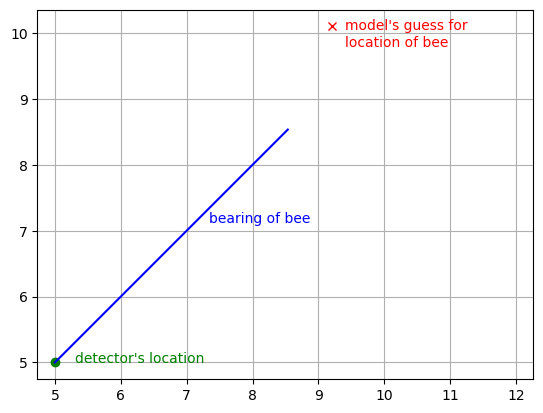

In [70]:
p = np.array([9.2, 10.1])
ob = np.array([23, 5, 5, 0.707, 0.707])
plt.plot(p[0],p[1],'xr')
plt.text(p[0]+0.2,p[1]-0.3,'model\'s guess for\nlocation of bee',color='red')
plt.plot(ob[1],ob[2],'og')
plt.text(ob[1]+0.3,ob[2],'detector\'s location',color='green')
plt.plot([ob[1],ob[1]+5*ob[3]],[ob[2],ob[2]+5*ob[4]],'b-')
plt.text(ob[1]+3.3*ob[3],ob[2]+3*ob[4],'bearing of bee',color='blue')
plt.axis('equal')
plt.xlim([4,13])
plt.grid()

we can see that the observation is fairly consistent with the model's prediction, but isn't perfect. The predicted bee location is a little to the left of the observed direction.

## Question 2: Developing the function for the negative log likelihood [2 marks]

We need a way of assigning a probability to this observation given the prediction location.

To this end, the negative log likelihood function will:

1. Compute a unit vector, `u`, pointing in the direction of the predicted location of the bee relative to the detector. Remember for one of the observations `ob[1:3]` contains the location of the detector. We define another variable `p`, that contains the bee's predicted location. Think about how you might code this.
2. Note that we now have two unit vectors. `ob[3:5]` pointing in the observed direction of the bee, and `u`, pointed in the direction of the predicted location. *The difference between these two vectors tells us how good the prediction is*. We therefore need to compute the difference between these two vectors: Subtract one from another, and then we will find the length, $l$, of the resulting vector. If this vector is shorter it means we have a better match between the model prediction and the observation.
3.  We will assume our observations are corrupted by some independent Gaussian noise. I.e. the $l$ of this 'error vector' is from a Gaussian distribution, with mean zero, and some noise variance $\sigma^2$. So the probability of $l$ (ignoring constant factors) is,

$$p(l) \sim N(l|0,\sigma^2) \propto \text{exp}\left(\frac{-l^2}{2\sigma^2}\right)$$

We need to compute the negative log probability.

Question 2: Write down the negative log probability (ignoring constant terms), i.e.
$$-\log_e \big(p(l) \big)$$

(hint: try substituting in the expression for $p(l)$ into this expression)

**[answer here]**  
1. Compute a unit vector $u$

    $$\mathbf{U} = \frac{\vec{\mathbf{Prediction}} - \vec{\mathbf{Detector}}}{\left|\vec{\mathbf{Prediction}} - \vec{\mathbf{Detector}}\right|}$$

2. Compute a length $l$

    $$\vec{\mathbf{L}} = \vec{\mathbf{U}} - \vec{\mathbf{Bearing}}$$

3. Compute the negative log probability of $l$

    From
    $$-\log_e (p(l))$$
    
   Substituting $p(l)$ 
    $$-\log_e \big(\text{exp}\left(\frac{-l^2}{2\sigma^2}\right)\big)$$
    
   Substituting $l$ 
    $$ -\log_e \big(\text{exp}\frac{-[(\vec{\mathbf{U}} - \vec{\mathbf{Bearing}})^T \times (\vec{\mathbf{U}} - \vec{\mathbf{Bearing}})]}{2\sigma^2}\big)$$

    From the log property
    $$-(\frac{-[(\vec{\mathbf{U}} - \vec{\mathbf{Bearing}})^T \times (\vec{\mathbf{U}} - \vec{\mathbf{Bearing}})]}{2\sigma^2}\big) $$

    Summerise
    $$-\log_e \big(p(l) \big) = (\frac{(\vec{\mathbf{U}} - \vec{\mathbf{Bearing}})^T \times (\vec{\mathbf{U}} - \vec{\mathbf{Bearing}})}{2\sigma^2}\big)$$
    

(Side Note: It is important that the likelihood function integrates to one (or at least a fixed constant) over the domain of possible observations. This is difficult to quantify exactly in many cases. We won't worry about it for this coursework).


## Question 3: Coding the negative log likelihood [4 marks]

We now need to implement the above steps. Complete the method below.

(Hint: For each of the steps 1-3, you will need to write one or two lines inside this method).

Please use the expression you devised above for the **unnormalised** negative log probability.

In [71]:
def negloglikelihood(ob,p,noise_scale=0.1):
  """Computes the negative log likelihood for ONE observation
    and ONE model's position prediction.

    Parameters
    ----------
    ob : (5,) array_like
        A 1d array describing an observation. Contains:
          [time,detectorx,detectory,bearingx,bearingy]
    p : (2,) array_like
        A 1d array describing a model's position prediction. Contains:
          [x,y]
    noise_scale : float, optional
        The standard deviation (\sigma) of the Gaussian noise distribution over the
        length of the vector between the unit vector pointing at the observed
        bee and the unit vector pointing at the predicted bee location.

    Returns
    -------
    float
        The negative log probability of the observation given the
        model's prediction, i.e.

                     -log p(ob|p)
    """

  ##Answer here
  u=(p - ob[1:3])/np.sqrt((p[0]-ob[1])**2+(p[1]-ob[2])**2) #Compute a unit vector U
  L=u-ob[3:5] #Compute a length L
  ans=(L.T@L)/(2*(noise_scale**2)) #Compute the negative log likelihood
  return ans


<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/var/folders/5w/bc6sh_zn18q5gdgdp60d2hnr0000gn/T/ipykernel_65572/2565123974.py:2: SyntaxWarning: invalid escape sequence '\s'
  """Computes the negative log likelihood for ONE observation


## Question 4: Check your solution [3 marks]

You should check your method is correct! As a simple check, let's consider a prediction that the bee is at position [50,30], and was detected by a detector
as [10,0], in unit vector direction [1,0].

Question 4: **Compute by hand:**

- the unit vector facing in the predicted direction of the bee from the detector
- the difference "error vector" between this vector and the unit vector pointing in the observed direction.
- the squared length of this "error vector".
- use this to compute the **unnormalised** negative log likelihood, with value of $\sigma=0.1$.

The answer should be 20.

You have two tasks,

- Q4a) Compute this by hand as described to check your answer.
- Q4b) Test that your `negloglikelihood` method also computed it as 20, by passing it the appropriate parameters.

*Hint 1: The most tricky bit will be writing the 5 elements in for the observation array, remember it needs to be of the form `np.array([time,detectorx,detectory,bearingx,bearingy])`. The 'time' element doesn't affect the result, so just put anything in for time.*

*Hint 2: You might get an error like `UFuncTypeError: Cannot cast ufunc 'divide' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'`, this will happen if you build your array with integers and later try to overwrite one with a float. Numpy might have an issue with entering floats into an integer array. The easiest fix is to replace e.g. `10` with `10.0` when creating the array.*

**[Answer here]**

```
4a) Write down the calculation you have done by hand, step by step, here.
```
If 

$\vec{Prediction} = (50,30)$

$\vec{Detector} = (10,0)$

$\sigma = 0.1$

1. Compute a unit vector $u$

    $$\mathbf{U} = \frac{\vec{\mathbf{Prediction}} - \vec{\mathbf{Detector}}}{\left|\vec{\mathbf{Prediction}} - \vec{\mathbf{Detector}}\right|}$$

    $$\mathbf{U} = \frac{\vec{\mathbf{(50,30)}} - \vec{\mathbf{(10,0)}}}{\left|\vec{\mathbf{(50,30)}} - \vec{\mathbf{(10,0)}}\right|}$$

    $$\mathbf{U} = \vec{\mathbf{(0.8,0.6)}}$$

2. Compute a length $l$

    $$\vec{\mathbf{L}} = \vec{\mathbf{U}} - \vec{\mathbf{Bearing}}$$

    $$\vec{\mathbf{L}} = \vec{\mathbf{(-0.2,0.6)}} - \vec{\mathbf{(1,0)}}$$

    $$\vec{\mathbf{L}} = \vec{\mathbf{(-0.2,0.6)}}$$
    
3. Compute the negative log probability of $l$

    From
    $$-\log_e (p(l))$$
    
   Substituting $p(l)$ 
    $$-\log_e \big(\text{exp}\left(\frac{-l^2}{2\sigma^2}\right)\big)$$


    From the log property
    $$-(\frac{-l^2}{2\sigma^2}\big) $$

    Summerise
    $$-\log_e \big(p(l) \big) = (\frac{l^2}{2\sigma^2}\big) $$

    $$-\log_e \big(p(l) \big) = (\frac{|(-0.2,0.6)|^2}{2*0.1^2}\big) $$

    $$-\log_e \big(p(l) \big) = 20

In [72]:
#Q4b) Check for the above example negloglikelihood returns about 20.
# You need to write something like, negloglikelihood(5_element_observation_array_here,2_element_predicted_location_array_here)

# Hint: It might not give exactly 20, but 19.99999 would be fine!

#[answer here]
ob=np.array([0.0,10.0,0.0,1.0,0.0])
p=np.array([50.0,30.0])
negloglikelihood(ob,p,)

19.999999999999993

## Linear regression

To make our predictions we need to predict the $x$ coordinate and the $y$ coordinate of the bee over time.

To do this we will use linear regression (but note that our likelihood function is not going to be amenable to a closed form solution).

We will use a Gaussian basis, and predict the location along each axis separately -- i.e. one regression problem will be 'what is x at time t?' and the other is 'what is y at time t?'

## Question 5: Prediction function [4 marks]

For our linear regression prediction we have a set of B=10 Gaussian bases centred at times $c_b = -3, 1, 5, 9,...,25, 29, 33$, each with a width hyperparameter of $\alpha=3$. We have a set of parameters, $\textbf{w}$, that we will later need to fit. The prediction at a time $t$ will equal:

$$ \sum_{b=1}^B w_b \;\text{exp}\Big(-\frac{(t-c_b)^2}{2 \alpha^2}\Big)$$

Write a function that takes a list of N times, e.g. `T = [1,2,3.5,4.5,6]` and a list of B parameters, e.g. `w = [1.2, -3.1, 4.5]` and returns the N predictions associated with those times.

*Hint: You could use `basis_centres = np.arange(-3,34,4)` to get a numpy array of the locations of the basis centres.*

In [73]:
def getpred(T,w,width=3):
  """Computes a prediction using linear regression and 10 Gaussian bases, each
     is centred at -3,1,5,9...25,29,33 seconds. They have a width specified by
     the `width` parameter.

    Parameters
    ----------
    T : (N,) array_like
        A 1d array of times (in seconds) to make the predictions.
    w : (16,) array_like
        A 1d array of the 16 parameters (the weights that each basis function
           is scaled by.
    width : float, optional
        The width of each Gaussian basis function (default = 3 seconds).

    Returns
    -------
    (N,) array_like
        The prediction for each time point in T, i.e.

                     sum_b w_b exp(-(t-c_b)^2/(alpha^2))

        where each c_b is the time at the centre of each basis.
    """
    

  #Answer here
  basis_centres = np.arange(-3,34,4)
  T = T[:, None]  
  basis_centres = basis_centres[None, :]  
  Phi = np.exp(-((T - basis_centres) ** 2) / (2 * (width ** 2))) 
  ans= Phi@w
  return ans
  

### Test your prediction function...

Here's a couple of tests to let you check if your code is correct.

In [74]:
#We use 'assert' to check that your method produces the right answers...

# if we pick a time exactly on the centre of a basis, with all the other bases
# equal to zero we should get that value...
testw = np.zeros(10)
testw[4] = 3.0 #this is for the basis at t=13
assert getpred(np.array([13]),testw)[0]==3.0

#if we take a point between two of our bases, each basis will contribute
#np.exp(-2**2/(2*3**2)) to the points value, so if we set all the other bases
#to zero, we would expect the point to equal:
#    np.exp(-2**2/(2*3**2))*(sum_of_the_two_bases)
testw = np.zeros(10)
testw[4] = 4.0 #basis at t=13
testw[5] = 6.0 #basis at t=17
prediction = getpred(np.array([15]),testw)[0] #15 is mid point
assert np.abs(np.exp(-2**2/(2*3**2))*(4+6)-prediction)<0.01

#test again with a change in the width of the gaussians.
testw = np.zeros(10)
testw[4] = 4.0 #basis at t=13
testw[5] = 6.0 #basis at t=17
prediction = getpred(np.array([0,15]),testw,width=4) #15 is mid point
assert np.abs(np.exp(-2**2/(2*4**2))*(4+6)-prediction[1])<0.01
assert np.abs(0.02-prediction[0])<0.01 #this is far from these basis fns so should be about zero.

We can produce a 2d array of prediction locations by doing two lots of regression to predict the x coordinate and to predict the y coordinate.

Here we use some random values for the 20 parameters (10 for each coordinate axis).

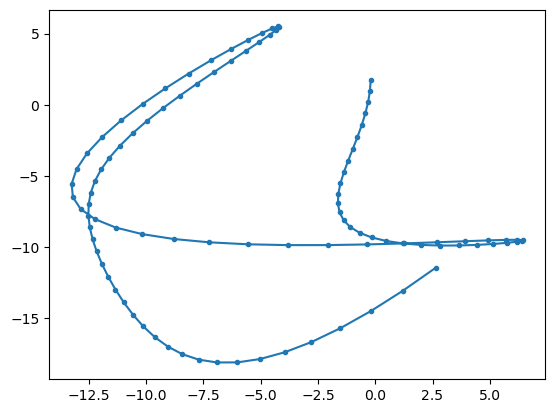

In [75]:
np.random.seed(1)
pred_t = np.linspace(0,30,100) #times to predict for... (100 points from 0s to 30s)

#we use Nbases*2 (=20) parameters (10 for the x-axis regression, 10 for the y-axis regression)
example_w = 10*np.random.randn(Nbases*2) #randomly sample some parameters.

x_predictions = getpred(pred_t,example_w[:Nbases]) #uses first 10 parameters in 'example_w' to predict x location over time
y_predictions = getpred(pred_t,example_w[Nbases:]) #uses last 10 parameters in 'example_w' to predict y location over time

#concantenate the two vectors into an array of Nx2 coordinates.
predpath = np.array([x_predictions,y_predictions]).T

#plot this path
plt.plot(predpath[:,0],predpath[:,1],'.-')

Note, rather than write out `dataset[1]['observations']` we save it in `obs` for convenience.

In the next step, we will want to try to fit our observations. To do this **we will first need to compute the predicted location at each of the times we observed the bee**. Those times are in the first column of `obs`, i.e.: `obs[:,0]`; the 'time' column in the observation vector.

In [76]:
obs = dataset[1]['observations']
truepath = dataset[1]['truepath']

In [77]:
obs[:,0] #this gets the times we've seen the bee from the detectors

array([ 0.        ,  1.81818182,  3.63636364,  5.45454545,  7.27272727,
        9.09090909, 10.90909091, 12.72727273, 14.54545455, 16.36363636,
       18.18181818, 20.        , 21.81818182, 23.63636364, 25.45454545,
       27.27272727, 29.09090909])

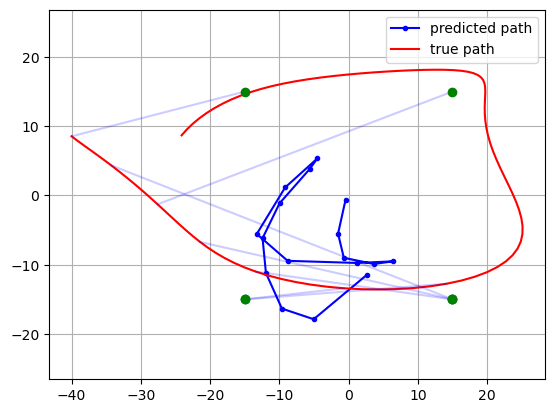

In [78]:
np.random.seed(1)

example_w = 10*np.random.randn(Nbases*2) #again, we'll use random parameter values

#!!!!!!!hint the next line might be useful later...!!!!!!!#
#we predict the path for the times we made observations...
#predpath is an Nx2 array of predicted locations (each row is the x,y coordinate
#at the times in obs[:,0]).
predpath = np.array([getpred(obs[:,0],example_w[:Nbases]),getpred(obs[:,0],example_w[Nbases:])]).T

plt.plot(predpath[:,0],predpath[:,1],'.-b',label='predicted path')
plt.plot(truepath[:,1],truepath[:,2],'-r',label='true path')

#just plot first 7 observation vectors to illustrate...
for ob in obs[:7]:
  r = np.sqrt(np.sum((truepath[np.argmin(np.abs(truepath[:,0]-ob[0])),1:3]-ob[1:3])**2))

  plt.plot([ob[1],ob[1]+ob[3]*r],[ob[2],ob[2]+ob[4]*r],'b-',alpha=0.2)
  plt.plot(ob[1],ob[2],'og')
plt.axis('equal')
plt.grid()
plt.legend()

This is obviously a poor fit at the moment as we used random values for our parameters. Let's look at how we can improve them.

I've also plotted the locations of the detectors and the first 7 observations, projected to the points on the true path where the bee was. Remember the observations only have the bearing (direction) of the bee, not the distance, so to estimate the path we need to combine the observations from the different detectors.

## Question 6: Total Negative Log Likelihood [4 marks]

For a given parameter vector, `w`, and observation array `obs` what is the TOTAL negative log likelihood (over all the observations in `obs`).

We will assume that the Gaussian noise in our model is independent between observations.

Your task:

- You need to find the negative log likelihood for each observation by calling `negloglikelihood` with parameters:

   - each row of `obs`
   - the associated predicted location at the time of the observation.
   - the `noise_scale` hyperparameter parameter.

- Add these negative log likelihoods together.

- Add an L2 regularisation penalty term to the negative log likelihood.

In summary, for each observation, `ob` (one row of `obs`), you need to know the predicted location `p` (see hint in the previous code block how to get the predicted path for each observation time - you could take each row from this path as a predicted location, `p`). Using this you need to compute `negloglikelihood(ob,p,noise_scale)`. Finally you need to add to this the L2 regularisation term. Remember to compute the L2 regularisation you need to find the sum of the squares of the values in `w`. This sum needs to be multiplied by the `reg` parameter. See the regularisation term at end of this expression.

$$\sum_{i=1}^N \text{NLL}(\text{ob}_i|p_i,\sigma^2) + \lambda \sum_{b=1}^B w_b^2$$

$\lambda$ is the `reg` parameter that controls how much regularisation to do.

*__Side Note__: Regularisation is the equivalent of putting a prior on our model, and we are therefore really optimising the posterior, and thus this is Maximum a posteriori (MAP) estimation rather than maximum likelihood. You need not worry about this distinction for this coursework!*

*__Hint__: The expression above for `predpath` will be useful here...!*

<br/>

Question 6: Code the `totalnegloglikelihood` method:

In [79]:
def totalnegloglikelihood(w,obs,reg=0.001,noise_scale=0.1):
  """
  Computes the total negative log likelihood for the given weight, using the observations
  in `obs` and with the hyperparameters reg (regularisation) and noise_scale.

  Parameters
  ----------
  w : (32,) array_like
      A 1d array of the 32 parameters (the weights that each basis function
      is scaled by.

  obs : (N, 5) array_like
      A 2d array of the N observations. Each row of this array contains:
        [time,detectorx,detectory,bearingx,bearingy]

  reg : float, optional
      The regularisation parameter (\lambda in the equation above).

  noise_scale : float, optional
      The standard deviation (\sigma) of the Gaussian noise distribution.
  Returns
  -------
  float :
      The total negative log likelihood for the given parameters, summed over
      all the observations in obs; plus the L2 regularisation term (scaled by `reg`).
  """

  #Answer here
  sum=0
  for i in range(len(obs)): 
    predpath = np.array([getpred(np.array([obs[:,0][i]]),w[:Nbases]),getpred(np.array([obs[:,0][i]]),w[Nbases:])]).T
    ans=negloglikelihood(obs[i],predpath[0],noise_scale)
    sum+=ans
  
  return sum+(reg*(w.T@w))

<>:2: SyntaxWarning: invalid escape sequence '\l'
<>:2: SyntaxWarning: invalid escape sequence '\l'
/var/folders/5w/bc6sh_zn18q5gdgdp60d2hnr0000gn/T/ipykernel_65572/3071314023.py:2: SyntaxWarning: invalid escape sequence '\l'
  """


## Testing the total negative log likelihood code

This section lets you check your implementation produces the right answers.

In [80]:
#again, using asserts to check you have the right answers...

#I reproduce an earlier test.
#a detector at position [10,0], observes bee in direction [1,0] at time 1
#and again, in the same place at time 17.
obs = np.array([[1,10,0,1,0],[17,10,0,1,0]])

#for testing we set all parameters to zero, except two, this should place
#the predicted bee (at time zero) at [50,30]...
testw = np.zeros(20)
testw[1] = 50.0
testw[11] = 30.0
testw[5] = 50.0
testw[15] = 30.0

#we computed the likelihood earlier for each of these observations should be
#about 20. With the regularisation (0.001*(50^2+30^2)) they should each be 23.4.
#So their sum should be about 46.8.
assert np.abs(totalnegloglikelihood(testw,obs,reg=0.001)-46.8)<0.001

## Optimising the parameters

Ideally we would used an auto-diff framework (we will next) but for now we can optimise the parameters using scipy...

Using the `minimize` method we find the vector of parameters that minimises the total negative log likelihood.

In [81]:
from scipy.optimize import minimize

#start with random location
ws0 = np.random.randn(Nbases*2)

#we'll use dataset[1]'s observations..
obs = dataset[1]['observations']

res = minimize(totalnegloglikelihood,ws0,args=(obs,0.1,0.001))
print(res.x)

[-12.99228236 -22.35148911 -12.48110833  -7.25506346  26.01719593
   2.87514812  17.62962145  -1.56233098 -16.83840362  -4.30198485
  17.74034723   0.27422152  -1.42290629 -10.5918747   -5.97682146
   5.67568835  11.41603987   9.0835961    7.45168123   3.29944146]


## Question 7: Plotting the results [4 marks]

Predict the path for 100 evenly spaced time points between 0 to 30, and plot the predicted path. On the same graph plot the true path, available in `dataset[1]['truepath']`.

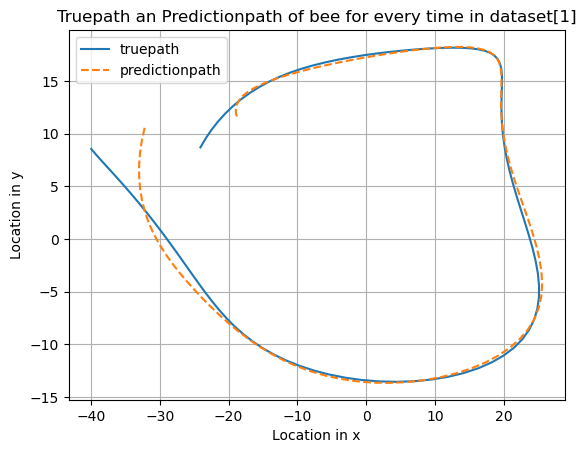

In [82]:
#Answer here
pred_t = np.linspace(0,30,100)
predpath = np.array([getpred(pred_t,res.x[:Nbases]),getpred(pred_t,res.x[Nbases:])]).T
plt.plot(dataset[1]['truepath'][:,1],dataset[1]['truepath'][:,2],'-',label='truepath')
plt.plot(predpath[:,0] ,predpath[:,1],'--',label='predictionpath')
plt.xlabel('Location in x')
plt.ylabel('Location in y')
plt.title('Truepath an Predictionpath of bee for every time in dataset[1]')
plt.legend()
plt.grid()




## Question 8: Optimising the hyperparameters [6 marks]

- Do a grid search over the regularisation and the noise_scale hyperparameters.
- Select appropriate ranges (consider if linear or log ranges would be best).
- For each configuration of hyperparameters,
  - Loop over the first five datasets in `dataset`.
  - Optimise the parameters for each dataset.
  - We will be comparing the predictions with the values in `dataset[i]['truepath']`. The first column contains the time, so you will need to call `getpred` with `dataset[i]['truepath'][:,0]` as the times to get predictions for. The last two columns are the x, y coordinates.
  - Compute the sum squared error of all these predictions (i.e. simply find the sum squared difference between the predicted locations values and the true path, something like: `np.sum((ds['truepath'][:,1:]-preds)**2)`
  - Record the sum squared error for each configuration of hyperparameters.
- Report the hyperparamters that minimise this sum squared error.

In [83]:
# Answer here

regularisation_range = np.logspace(0,0.3,5)
noise_scale_range = np.logspace(0,0.3,5)

results = []

for reg in regularisation_range:
    for noise_scale in noise_scale_range:
        total_error = 0
        for i in range(5):
            true_path = dataset[i]['truepath']
            times = true_path[:, 0]  
            res = minimize(totalnegloglikelihood,ws0,args=(dataset[i]['observations'],reg,noise_scale))
            predpath = np.array([getpred(pred_t,res.x[:Nbases]),getpred(pred_t,res.x[Nbases:])]).T
            
            error = np.sum((true_path[:, 1:] - predpath) ** 2)  
            total_error += error
        
        results.append({'regularisation': reg, 'noise_scale': noise_scale, 'total_error': total_error})
best_result = min(results, key=lambda x: x['total_error'])
print(f"Best hyperparameters: {best_result}")


Best hyperparameters: {'regularisation': 1.0, 'noise_scale': 1.0, 'total_error': 280728.94512278377}


## Estimating uncertainty

We can estimate the uncertainty in our predictions. As the details of this approach are beyond the module, I've just put some information about how this is done at the end of this notebook for those who are interested. So for this question we just look at the result of the calculation.

Here are the set of samples using the Laplace approximation for `dataset[5]`.

![test](https://external-content.duckduckgo.com/iu/?u=https://drive.usercontent.google.com/download?id=1mvIwUBngNcIfKB3GmeLMITJg27D29Duh&export=download&authuser=0&confirm=t&uuid=e6be019a-6c83-4a92-a372-de9e73e1d627&at=AENtkXYw0QVYJdK2EInNTgiB6xa1:1730842927336)

The black line shows the maximum a posteriori estimate, the grey lines are samples from the approximation to the posterior distribution of the parameters. The true path is in red. The blue lines indicate the observations made by our detectors.

To understand this a little more clearly, we can plot the distribution of predicted locations at a single time point (t=1.8s):

![test](https://external-content.duckduckgo.com/iu/?u=https://drive.usercontent.google.com/download?id=1abkQjHUrhmGwZ1AbZ0EbA8i98MjRA9Eh&export=download&authuser=0&confirm=t&uuid=e209d1d2-872f-4dbb-941a-ff1f7396271e&at=AENtkXbw7uKK2_c_2ExpdJsPpINe:1730842976324)

The black cross (+) is the maximum a posteriori estimate, the scattered black points are samples from the posterior to illustrate the distribution. The true location is marked by the red disk, the first three observations (by coincidence all associated with the same detector) are plotted.

## Question 9: Explaining and Interpreting [14 marks]

- Q9a) Look at the above graph: Considering the early observations, explain why the posterior distribution of predicted locations at $t=1.8s$ has the distribution indicated? [3 marks]

- Q9b) Why does the predicted path at the start and end of the time series curl back into the centre of the plot? [3 marks]

- Q9c) Why are we evaluating the performance on `dataset[5]` and not one of the datasets used during optimising the hyperparameters? [1 mark]

- Q9d) Why was a Gaussian basis a good choice for this problem? [2 marks]

- Q9e) If the detectors had 'false positive' erroneous detections, the observations would contain outliers. Propose a change that could help address these outliers in the data. [2 marks]

- Q9f) What other hyperparamters could have been optimised? [1 mark]

- Q9g) If the width of the Gaussian bases was 30s instead of 3s, what effect would that have on the type of path that could be predicted? [2 marks]

**[Answer here]**

Q9a) Because The detectors at this time provide limited information, leading to a wider spread in the predicted locations, reflecting the variability in the model's confidence.

Q9b) Because the predictions are being influenced by the Gaussian basis functions, which are defined over a specific range.

Q9c) Evaluating on dataset[5] ensures unbiased validation, as it is not involved in model training. This prevents overfitting and provides a true measure of generalization.

Q9d) Gaussian basis functions are localized and smooth, which makes them well-suited for representing non-linear functions like the path in this assignment. They allow flexible modeling of data while controlling complexity through width and number of basis functions.

Q9e) To address false-positive detections that introduce outliers, one approach would be to apply data preprocessing techniques like outlier removal or weighting observations.

Q9f) Number of basis functions

Q9g) Wider Gaussian bases would produce smoother predictions, as the basis functions would overlap more significantly. However, this could lead to reduced flexibility, making it harder to capture sharp variations in the true path.

<hr>

# Part 2: Neural networks, Dimensionality reduction and Clustering

This is the *second* of the two parts, accounting for the other 50 marks of the overall coursework mark.
Attempt as much of this as you can, each of the questions are self-contained and contain some easier and harder bits so even if you can't complete Question 1 straight away then you may still be able to progress with the other questions.

## Overview
This part of the assignment will cover:
- Q1: Classification and neural networks (lectures 5 and 6)
- Q2: Dimensionality reduction and clustering (lectures 7 and 8)

### Allowed libraries
For this part we are looking for you to demonstrate what you have learned in this module and so we will be restricting what libraries you can use to
- Numpy and Scipy
- Matplotlib
- PyTorch
- Scikit-Learn (for simple models)

### Assessment Criteria

- The marks for this part are distributed as follows:
    - **Q1**: 28 marks
    - **Q2**: 17 marks
    - **Code quality**: 5 marks
        - Marks for code quality does not cover the correctness of your answers to each section but rather the style and clarity of your code. You should aim to avoid repetition of code, have clear but concise comments and appropriately named variables.
- You'll get marks for correct code that does what is asked and for text based answers to particular points. We are not overly concerned with model performance but you should still aim to get the best results you can for your chosen approaches. You should make sure any figures are plotted properly with axis labels and figure legends.

If you are unsure about how to proceed then please ask during the lectures/labs or on the discussion board.



## Question 1: Classification and neural networks [28 marks]

This first question will look at implementing classifier models via supervised learning to correctly classify images.

We will be using images from the MedMNIST dataset which contains a range of health related image datasets that have been designed to be similar to the original digits MNIST dataset. Specifically we will be working with the OrganAMNIST part of the dataset. The code below will download the dataset for you and load the numpy data file. The data file will be loaded as a dictionary that contains both the images and labels already split to into training, validation and test sets. The each sample is a 28 by 28 greyscale image and are not necessarily normalised. You will need to consider any pre-processing.

Your task in this questions is to train **at least 4** different classifier architectures (e.g logistic regression, fully-connected network, convolutional network etc) on this dataset and compare their performance. These can be any of the classifier models introduced in class or any reasonable model from elsewhere. You should consider 4 architectures that are a of suitable variety i.e simply changing the activation function would score lower marks than trying different layer combinations.

This question will be broken into the following parts:
1) A text description of the model architectures that you have selected and a justification of why you have chosen them. Marks will be awarded for suitability, variety and quality of the architectures.
2) The training of the models and the optimisation of any hyper-parameters.
3) A plot comparing the training and test accuracy of the different architectures with a short discussion your results.

### About the dataset

For this question, you will be working with the OrganA-MNIST dataset. This is a benchmark dataset compiled using real CT scans of patients. The images have been localised and cropped to a 28 x 28 pixel image to replicate the original digits MNIST format. You can find out more information about the MedMNIST [here](https://arxiv.org/pdf/2110.14795). The code below will download the data for you, load the initial data dictionary and plot the 11 classes to visualise what the data is like. For OrganA-MNIST, it contains images of various organs: Left Lung, Right Lung, Heart, Liver, Spleen, Pancreas, Left Kidney, Right Kidney, Bladder, Left Fermoral Head, Right Femoral Head. However, there is no clear documentation relating the numerical class ids to these names. We will work only with the numerical labels but please be aware of this.

In [84]:
import numpy as np
import urllib.request
import os

datafile = 'organamnist'

# Download the dataset to the local folder
if not os.path.isfile(f'./{datafile}.npz'):
    urllib.request.urlretrieve(f'https://zenodo.org/records/10519652/files/{datafile}.npz?download=1', f'{datafile}.npz')

# Load the compressed numpy array file
dataset = np.load(f'./{datafile}.npz')

# The loaded dataset contains each array internally
for key in dataset.keys():
    print(f'dict key: {key:12s}, array shape: {dataset[key].shape}, array datatpye: {dataset[key].dtype}')

dict key: train_images, array shape: (34561, 28, 28), array datatpye: uint8
dict key: train_labels, array shape: (34561, 1), array datatpye: uint8
dict key: val_images  , array shape: (6491, 28, 28), array datatpye: uint8
dict key: val_labels  , array shape: (6491, 1), array datatpye: uint8
dict key: test_images , array shape: (17778, 28, 28), array datatpye: uint8
dict key: test_labels , array shape: (17778, 1), array datatpye: uint8


This dataset contains 11 classes.


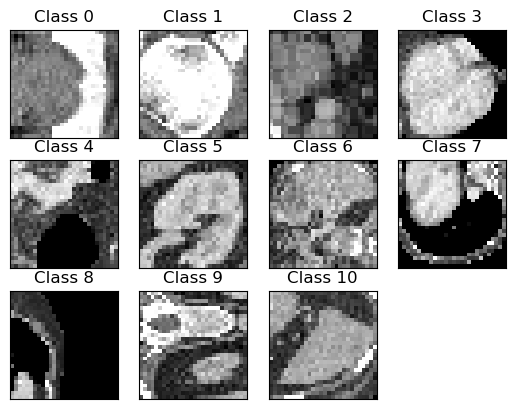

In [41]:
import matplotlib.pyplot as plt

class_ids, class_first_occur = np.unique(dataset['train_labels'], return_index=True)

print(f'This dataset contains {len(class_ids)} classes.')


Nrows = 3; Ncols = 4
fig, ax = plt.subplots( Nrows, Ncols, sharex=True, sharey=True)

for i in range(Nrows):
    for j in range(Ncols):
        if( i*Ncols + j < len(class_ids)):
            idx = class_first_occur[i*Ncols + j]
            label = dataset['train_labels'][idx,0]
            ax[i,j].set_title(f'Class {label}')
            ax[i,j].set_yticks([])
            ax[i,j].set_xticks([])
            ax[i,j].imshow(dataset['train_images'][idx], cmap='gray')
        else:
            ax[i,j].axis('off')
plt.show()


### 1.1: Initial analysis: clustering and dimensionality reduction [5 marks]

The first step of this question will be analyse the data using clustering and dimensionality reduction. In the following blocks you should:
1) Apply a **clustering algorithm** of your choice on the training data (using all 784 pixels as features unless there is a good reason to reduce first). Aim to split the data into 11 clusters.
2) After you have clustered the data, use a **dimensionality reduction algorithm** (e.g pca) to reduce the images to 3 dimensions.
3) Use these reduced dimensions to **create two 3d plots of the test images** with a) the points coloured using the true labels and b) the points coloured using the cluster labels. An example of a 3d plot is given below.
4) Provide a **short comment** on what observe from your clustered data.

For this sub-question you may use scikit-learn.

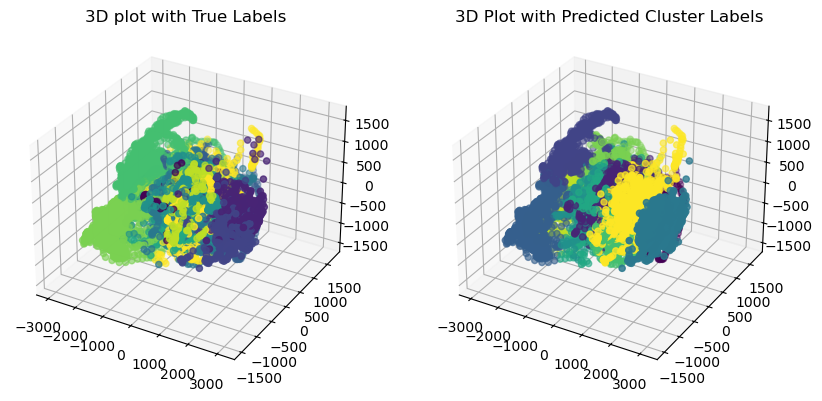

In [85]:
# Write your clustering and dimensionality reduction algorithms here.
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
flattened_dataset_train = dataset['train_images'].reshape(dataset['train_images'].shape[0], -1)
kmeans = KMeans(n_clusters=11, random_state=42)
dataset_cluster = kmeans.fit(flattened_dataset_train)
pca = PCA(n_components=3)
dataset_PCA = pca.fit(flattened_dataset_train)

flattened_dataset_test = dataset['test_images'].reshape(dataset['test_images'].shape[0], -1)
Ptest = dataset_cluster.predict(flattened_dataset_test)
Ttest=dataset_PCA.transform(flattened_dataset_test)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(121,projection='3d')
ax.scatter(Ttest[:, 0], Ttest[:, 1], Ttest[:, 2], c=dataset['test_labels'])
ax.set_title("3D plot with True Labels")

ax2 = fig.add_subplot(122,projection='3d')
ax2.scatter(Ttest[:, 0], Ttest[:, 1], Ttest[:, 2], c=Ptest)
ax2.set_title("3D Plot with Predicted Cluster Labels")
plt.show()


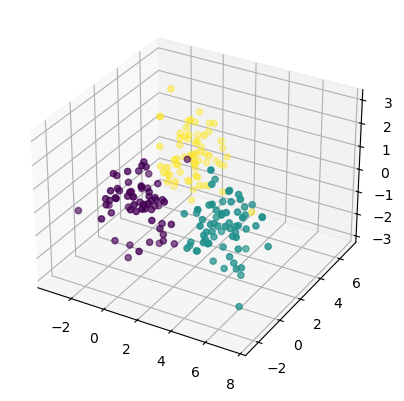

In [86]:
# Example of a 3d plot using matplotlib
from sklearn.datasets import make_blobs

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

example_x, example_labels = make_blobs(200, 3, centers=[[0.0, 0.0, 0.0], [5.0, 0.0, 0.0], [0.0, 5.0, 0.0]])

ax.scatter(example_x[:,0], example_x[:,1], example_x[:,2], c=example_labels)
plt.show()

Write your short comment on the clustering results in this markdown box.

### 1.2 What models/architectures have you chosen to implement [5 marks]

Now we will turn to applying classification models to this dataset, your task now is to choose 4 appropriate models or techniques and train them on the OrganA-MNIST dataset. These should have some distinct difference between them, for example a neural network with different number of layers is acceptable but having the same number layers with different sizes is not. This is not limited to neural networks but you should have at least one neural network model. Otherwise, you may use decision trees and/or logistic regression etc.

In the following block, write a short (max 400 words) **description and justification** of the architectures that you have chosen to implement. You should also think about any optimisers and error or loss functions that you will be using and why they might be suitable. We are looking for you to assess why the architectures are appropriate for the task at hand. Marks will be awared for clear and well reasoned justifications.

*Write your answer in this markdown cell* 

1. Convolutional Neural Network (CNN): CNNs are well-suited for image-based tasks due to the ability to extract spatial features. By using convolutional layers followed by pooling layers, the model captures a features from the images. I will use ReLU as the activation function to introduce non-linearity and cross-entropy loss as the objective function for multi-class classification. An Adam optimizer will be employed for its efficiency.

2. Fully Connected Neural Network (FCNN): While CNNs are optimized for spatial data, FCNNs are a general-purpose model architecture that can still handle image data when flattened into a vector. FCNNs provide a baseline to evaluate how well a standard neural network performs without specialized feature extraction mechanisms. ReLU activation will be used in the hidden layers, and the Adam optimizer will facilitate robust learning with the Mean Squared Error (MSE) loss.

3. Decision Tree: The Decision Tree model is a non-parametric method that splits the data based on feature values to form a tree structure. It is easier to understand how predictions are made. Decision Trees are also robust to overfitting for small datasets and can handle non-linear relationships effectively. 

4. Logistic Regression: Logistic Regression is selected as a simple linear model that offers interpretability and computational efficiency. By modeling the data linearly, it provides a straightforward baseline for classification performance.

### 1.3 Implementation and training of your models. [10 marks]

a) Now implement the models that you have introduced above, train them and optimise any hyper-parameters using the validation set. You may wish to store any training results for the next sub-question.

### "Implementation of a Convolutional Neural Network (CNN) Model"

In [87]:
# Program your models here. You can use as many cells as necessary but aim to be concise.

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from itertools import product

best_val_accuracy = 0.0
best_hyperparams = {}

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1,16,3) 
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(16,32,3,2) 
        self.act = nn.ReLU()
        self.dropout = nn.Dropout(0.5) 
        self.fc1 = nn.Linear(32 * 3 * 3, 120)
        self.fc2 = nn.Linear(120, 80)
        self.fc3 = nn.Linear(80, 11)

    def forward(self, x):
        x = self.pool(self.act(self.conv1(x)))
        x = self.pool(self.act(self.conv2(x)))
        x = x.view(-1, 32 * 3 * 3)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


batch_size = [16,32,64]
learning_rate = [0.0001,0.001,0.01]
epochs = 20


train_images = torch.tensor(dataset['train_images'].astype(np.float32) / 255.0).unsqueeze(1)  
train_labels = torch.tensor(dataset['train_labels'].flatten().astype(np.int64))
val_images = torch.tensor(dataset['val_images'].astype(np.float32) / 255.0).unsqueeze(1)
val_labels = torch.tensor(dataset['val_labels'].flatten().astype(np.int64))
test_images = torch.tensor(dataset['test_images'].astype(np.float32) / 255.0).unsqueeze(1)
test_labels = torch.tensor(dataset['test_labels'].flatten().astype(np.int64))

train_dataset = TensorDataset(train_images, train_labels)
val_dataset = TensorDataset(val_images, val_labels)
test_dataset = TensorDataset(test_images, test_labels)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for lr,batch in product(learning_rate,batch_size):
    print(f"Training with LR={lr}, Batch Size={batch}")
    train_loader = DataLoader(train_dataset, batch_size=batch, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch, shuffle=False)

    model = CNN().to(device)
    loss_func = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr)

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = loss_func(outputs, labels)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Epoch {epoch + 1}/{epochs}, Loss: {running_loss / len(train_loader):.4f}")

    # Validation Loop
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = loss_func(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    print(f"Validation Loss: {val_loss / len(val_loader):.4f}, Accuracy: {val_accuracy:.2f}%")

    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_hyperparams = {'learning_rate': lr, 'batch_size': batch}

        torch.save({
        'model_state_dict': model.state_dict(),
        'hyperparameters': best_hyperparams
    }, 'best_model.pth')

print(f"Best Hyperparameters: {best_hyperparams}, Best Validation Accuracy: {best_val_accuracy:.2f}%")







Training with LR=0.0001, Batch Size=16
Epoch 1/20, Loss: 1.4383
Epoch 2/20, Loss: 0.9164
Epoch 3/20, Loss: 0.7127
Epoch 4/20, Loss: 0.6083
Epoch 5/20, Loss: 0.5403
Epoch 6/20, Loss: 0.4896
Epoch 7/20, Loss: 0.4489
Epoch 8/20, Loss: 0.4134
Epoch 9/20, Loss: 0.3805
Epoch 10/20, Loss: 0.3509
Epoch 11/20, Loss: 0.3254
Epoch 12/20, Loss: 0.3002
Epoch 13/20, Loss: 0.2809
Epoch 14/20, Loss: 0.2621
Epoch 15/20, Loss: 0.2457
Epoch 16/20, Loss: 0.2307
Epoch 17/20, Loss: 0.2172
Epoch 18/20, Loss: 0.2033
Epoch 19/20, Loss: 0.1923
Epoch 20/20, Loss: 0.1805
Validation Loss: 0.1768, Accuracy: 94.99%
Training with LR=0.0001, Batch Size=32
Epoch 1/20, Loss: 1.6701
Epoch 2/20, Loss: 1.1276
Epoch 3/20, Loss: 0.9546
Epoch 4/20, Loss: 0.8281
Epoch 5/20, Loss: 0.7288
Epoch 6/20, Loss: 0.6531
Epoch 7/20, Loss: 0.5926
Epoch 8/20, Loss: 0.5404
Epoch 9/20, Loss: 0.4996
Epoch 10/20, Loss: 0.4672
Epoch 11/20, Loss: 0.4379
Epoch 12/20, Loss: 0.4138
Epoch 13/20, Loss: 0.3921
Epoch 14/20, Loss: 0.3746
Epoch 15/20, L

### "Implementation of a Logistic Regression Model"

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import joblib


train_images = dataset['train_images'].reshape(dataset['train_images'].shape[0], -1).astype(np.float32) / 255.0  
train_labels = dataset['train_labels'].flatten().astype(np.int64)
val_images = dataset['val_images'].reshape(dataset['val_images'].shape[0], -1).astype(np.float32) / 255.0
val_labels = dataset['val_labels'].flatten().astype(np.int64)
test_images = dataset['test_images'].reshape(dataset['test_images'].shape[0], -1).astype(np.float32) / 255.0
test_labels = dataset['test_labels'].flatten().astype(np.int64)

n_components = 100  
pca = PCA(n_components=n_components, random_state=42)
train_images_pca = pca.fit_transform(train_images)
val_images_pca = pca.transform(val_images)
test_images_pca = pca.transform(test_images)  


log_reg = LogisticRegression(solver='lbfgs',multi_class='multinomial', random_state=42)

param_grid = {
    'C': [0.1, 1, 10],             
    'max_iter': [800, 900, 1000],
    'solver': ['lbfgs', 'saga']   
    }

best_val_accuracy = 0.0
best_params = None
best_model = None

for C in param_grid['C']:
    for max_iter in param_grid['max_iter']:
        for solver in param_grid['solver']:
            log_reg = LogisticRegression(C=C, max_iter=max_iter, solver=solver,tol=1e-3, multi_class='multinomial', random_state=42)
            log_reg.fit(train_images_pca, train_labels)
        
       
            val_predictions = log_reg.predict(val_images_pca)
            val_accuracy = accuracy_score(val_labels, val_predictions)
            print(f"Validation Accuracy: {val_accuracy*100:.2f}% | C={C}, max_iter={max_iter} | solver={solver}")
        
        
            if val_accuracy > best_val_accuracy:
                best_val_accuracy = val_accuracy
                best_params = {'C': C, 'max_iter': max_iter, 'solver': solver}
                best_model = log_reg
            joblib.dump({
                        'best_model': best_model,
                        'best_params': best_params,
                        'best_val_accuracy': best_val_accuracy
                            }, 'best_logistic_regression_model.pkl')

print(f"Best Hyperparameters: {best_params}, Best Validation Accuracy: {best_val_accuracy*100:.2f}%")


Validation Accuracy: 87.60% | C=0.1, max_iter=800 | solver=lbfgs
Validation Accuracy: 87.71% | C=0.1, max_iter=800 | solver=saga
Validation Accuracy: 87.60% | C=0.1, max_iter=900 | solver=lbfgs
Validation Accuracy: 87.71% | C=0.1, max_iter=900 | solver=saga
Validation Accuracy: 87.60% | C=0.1, max_iter=1000 | solver=lbfgs
Validation Accuracy: 87.71% | C=0.1, max_iter=1000 | solver=saga
Validation Accuracy: 87.40% | C=1, max_iter=800 | solver=lbfgs
Validation Accuracy: 87.46% | C=1, max_iter=800 | solver=saga
Validation Accuracy: 87.40% | C=1, max_iter=900 | solver=lbfgs
Validation Accuracy: 87.46% | C=1, max_iter=900 | solver=saga
Validation Accuracy: 87.40% | C=1, max_iter=1000 | solver=lbfgs
Validation Accuracy: 87.46% | C=1, max_iter=1000 | solver=saga
Validation Accuracy: 87.14% | C=10, max_iter=800 | solver=lbfgs
Validation Accuracy: 87.29% | C=10, max_iter=800 | solver=saga
Validation Accuracy: 87.14% | C=10, max_iter=900 | solver=lbfgs
Validation Accuracy: 87.29% | C=10, max_ite

### "Implementation of a Decision Tree Classifier Model"

In [89]:
from sklearn.tree import DecisionTreeClassifier

train_images = dataset['train_images'].reshape(dataset['train_images'].shape[0], -1).astype(np.float32) / 255.0
train_labels = dataset['train_labels'].flatten().astype(np.int64)
val_images = dataset['val_images'].reshape(dataset['val_images'].shape[0], -1).astype(np.float32) / 255.0
val_labels = dataset['val_labels'].flatten().astype(np.int64)
test_images = dataset['test_images'].reshape(dataset['test_images'].shape[0], -1).astype(np.float32) / 255.0
test_labels = dataset['test_labels'].flatten().astype(np.int64)


param_grid = {
    'criterion': ['gini', 'entropy'],   
    'max_depth': [None, 10, 20, 30],   
    'min_samples_split': [2, 5, 10],   
    'min_samples_leaf': [1, 2, 5]      
}

best_val_accuracy = 0.0
best_params = None
best_model = None

for criterion in param_grid['criterion']:
    for max_depth in param_grid['max_depth']:
        for min_samples_split in param_grid['min_samples_split']:
            for min_samples_leaf in param_grid['min_samples_leaf']:
                
                tree_model = DecisionTreeClassifier(
                    criterion=criterion,
                    max_depth=max_depth,
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf,
                    random_state=42
                )
                tree_model.fit(train_images, train_labels)

                
                val_predictions = tree_model.predict(val_images)
                val_accuracy = accuracy_score(val_labels, val_predictions)
                print(f"Validation Accuracy: {val_accuracy*100:.2f}% | "
                      f"criterion={criterion}, max_depth={max_depth}, "
                      f"min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf}")

                
                if val_accuracy > best_val_accuracy:
                    best_val_accuracy = val_accuracy
                    best_params = {
                        'criterion': criterion,
                        'max_depth': max_depth,
                        'min_samples_split': min_samples_split,
                        'min_samples_leaf': min_samples_leaf
                    }
                    best_model = tree_model
                joblib.dump({
                            'best_model': best_model,
                            'best_params': best_params
                                }, 'best_Decision Tree Classifier_model.pkl')

print(f"Best Hyperparameters: {best_params}, Best Validation Accuracy: {best_val_accuracy*100:.2f}%")

Validation Accuracy: 77.11% | criterion=gini, max_depth=None, min_samples_split=2, min_samples_leaf=1
Validation Accuracy: 77.20% | criterion=gini, max_depth=None, min_samples_split=2, min_samples_leaf=2
Validation Accuracy: 76.75% | criterion=gini, max_depth=None, min_samples_split=2, min_samples_leaf=5
Validation Accuracy: 77.15% | criterion=gini, max_depth=None, min_samples_split=5, min_samples_leaf=1
Validation Accuracy: 77.78% | criterion=gini, max_depth=None, min_samples_split=5, min_samples_leaf=2
Validation Accuracy: 76.75% | criterion=gini, max_depth=None, min_samples_split=5, min_samples_leaf=5
Validation Accuracy: 75.66% | criterion=gini, max_depth=None, min_samples_split=10, min_samples_leaf=1
Validation Accuracy: 77.21% | criterion=gini, max_depth=None, min_samples_split=10, min_samples_leaf=2
Validation Accuracy: 76.75% | criterion=gini, max_depth=None, min_samples_split=10, min_samples_leaf=5
Validation Accuracy: 80.06% | criterion=gini, max_depth=10, min_samples_split=2

### "Implementation of a Fully Connected Neural Network Model (FCNN)"

In [90]:
train_images = dataset['train_images'].reshape(dataset['train_images'].shape[0], -1).astype(np.float32) / 255.0
train_labels = dataset['train_labels'].flatten().astype(np.int64)
val_images = dataset['val_images'].reshape(dataset['val_images'].shape[0], -1).astype(np.float32) / 255.0
val_labels = dataset['val_labels'].flatten().astype(np.int64)
test_images = dataset['test_images'].reshape(dataset['test_images'].shape[0], -1).astype(np.float32) / 255.0
test_labels = dataset['test_labels'].flatten().astype(np.int64)

# Convert to PyTorch Tensors
train_images = torch.tensor(train_images)
train_labels = torch.tensor(train_labels)
val_images = torch.tensor(val_images)
val_labels = torch.tensor(val_labels)
test_images = torch.tensor(test_images)
test_labels = torch.tensor(test_labels)

class FullyConnectedNN(nn.Module):
    def __init__(self):
        super(FullyConnectedNN, self).__init__()
        self.fc1 = nn.Linear(784, 256)  
        self.fc2 = nn.Linear(256, 128)        
        self.fc3 = nn.Linear(128, 11) 
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)        

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

train_dataset = TensorDataset(train_images, train_labels)
val_dataset = TensorDataset(val_images, val_labels)
  
batch_size = [16,32,64]
learning_rate = [0.0001,0.001,0.01]
epochs = 20

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

for lr,batch in product(learning_rate,batch_size):
    print(f"Training with LR={lr}, Batch Size={batch}")
    model = FullyConnectedNN().to(device)
    loss_func = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    train_loader = DataLoader(train_dataset, batch_size=batch, shuffle=False)
    val_loader = DataLoader(val_dataset, batch_size=batch, shuffle=False)
    # Training Loop
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0

        for batch_images, batch_labels in train_loader:
            # Move data to device
            batch_images = batch_images.to(device)
            batch_labels = batch_labels.to(device)

            # Forward pass
            outputs = model(batch_images)
            loss = loss_func(outputs, batch_labels)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Epoch {epoch + 1}/{epochs}, Loss: {running_loss / len(train_loader):.4f}")

    # Validation Loop
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = loss_func(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    print(f"Validation Loss: {val_loss / len(val_loader):.4f}, Accuracy: {val_accuracy:.2f}%")

    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_hyperparams = {'learning_rate': lr, 'batch_size': batch}
    torch.save({
        'model_state_dict': model.state_dict(),
        'hyperparameters': best_hyperparams
    }, 'best_model_FCNN.pth')
        
print(f"Best Hyperparameters: {best_hyperparams}, Best Validation Accuracy: {best_val_accuracy:.2f}%")






Training with LR=0.0001, Batch Size=16
Epoch 1/20, Loss: 1.2084
Epoch 2/20, Loss: 0.7911
Epoch 3/20, Loss: 0.6620
Epoch 4/20, Loss: 0.5751
Epoch 5/20, Loss: 0.5136
Epoch 6/20, Loss: 0.4606
Epoch 7/20, Loss: 0.4153
Epoch 8/20, Loss: 0.3773
Epoch 9/20, Loss: 0.3434
Epoch 10/20, Loss: 0.3129
Epoch 11/20, Loss: 0.2877
Epoch 12/20, Loss: 0.2646
Epoch 13/20, Loss: 0.2442
Epoch 14/20, Loss: 0.2287
Epoch 15/20, Loss: 0.2129
Epoch 16/20, Loss: 0.1993
Epoch 17/20, Loss: 0.1865
Epoch 18/20, Loss: 0.1747
Epoch 19/20, Loss: 0.1636
Epoch 20/20, Loss: 0.1527
Validation Loss: 0.3601, Accuracy: 92.20%
Training with LR=0.0001, Batch Size=32
Epoch 1/20, Loss: 1.3313
Epoch 2/20, Loss: 0.8778
Epoch 3/20, Loss: 0.7384
Epoch 4/20, Loss: 0.6523
Epoch 5/20, Loss: 0.5899
Epoch 6/20, Loss: 0.5396
Epoch 7/20, Loss: 0.4979
Epoch 8/20, Loss: 0.4614
Epoch 9/20, Loss: 0.4266
Epoch 10/20, Loss: 0.3984
Epoch 11/20, Loss: 0.3724
Epoch 12/20, Loss: 0.3475
Epoch 13/20, Loss: 0.3262
Epoch 14/20, Loss: 0.3072
Epoch 15/20, L

b) In the following block, provide a description of how you have selected or optimised any hyper-parameters.

*Write your answer in this markdown cell*

2 hyperparameter that I selected is Learning rate and Batch size

For the Learning Rate: The learning rate determines the step size at each iteration while optimizing the model weights. To find the optimal value, I tested a range of learning rates (0.0001,0.001,0.01) using a fixed batch size. The selection was based on monitoring the reconstruction error during validation and choosing the learning rate that minimized the error while maintaining stability.

For Batch Size: The batch size influences the model's ability to generalize and the training efficiency.I evaluated batch sizes (16,32,64) with a fixed learning rate and selected the one that provided the lowest validation loss while balancing computational efficiency.


### 1.4 Classification results based on the test data [8 marks]

a) Create **two bar charts** that provides a comparison between your 4 models; the first should compare the classification accuracy on the training dataset, while the second should compare it on the test set.


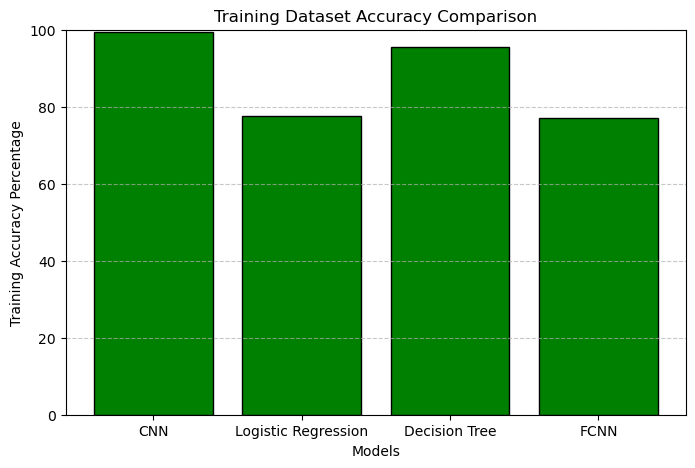

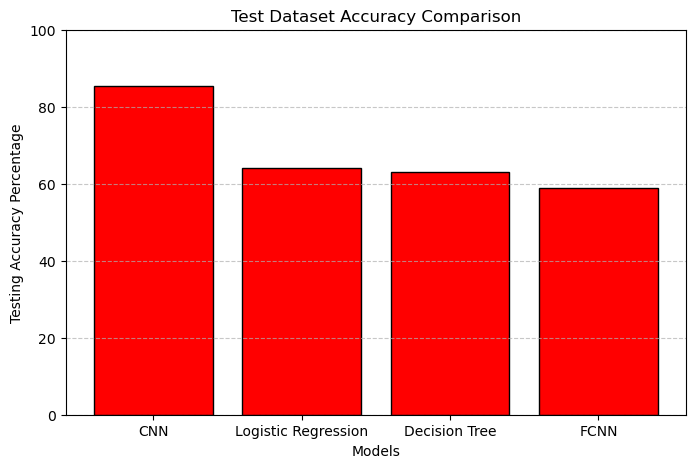

In [91]:
# Program your plots here.

checkpoint_logis = joblib.load('best_logistic_regression_model.pkl')
best_model_logis = checkpoint_logis['best_model']
test_images_pca = pca.transform(test_images)
test_predictions_logis = best_model_logis.predict(test_images_pca)
test_accuracy_logis = accuracy_score(test_labels, test_predictions_logis)
train_images_pca = pca.transform(train_images)  
train_predictions_logis = best_model_logis.predict(train_images_pca)
train_accuracy_logis = accuracy_score(train_labels, train_predictions_logis)

checkpoint_decision_T = joblib.load('best_Decision Tree Classifier_model.pkl')
best_model_decision_T = checkpoint_decision_T['best_model']
test_predictions_decision_T = best_model_decision_T.predict(test_images)
test_accuracy_decision_T = accuracy_score(test_labels, test_predictions_decision_T)
train_predictions_decision_T = best_model_decision_T.predict(train_images)
train_accuracy_decision_T = accuracy_score(train_labels, train_predictions_decision_T)

def CNN_accuracy(imageee,labelll,dataset):
    CNN_model = CNN()
    checkpoint_CNN = torch.load('best_model_CNN.pth', weights_only=True)
    CNN_model.load_state_dict(checkpoint_CNN['model_state_dict'])
    CNN_model.eval()
    imageee_CNN= torch.tensor(dataset[imageee].astype(np.float32) / 255.0).unsqueeze(1)
    labelll_CNN = torch.tensor(dataset[labelll].flatten().astype(np.int64))
    _dataset = TensorDataset(imageee_CNN, labelll_CNN)
    loader_CNN = DataLoader(_dataset, batch_size=64, shuffle=False)
    all_predictions_CNN = []
    all_labels_CNN = []
    with torch.no_grad(): 
        for images, labels in loader_CNN:
            images = images.to(device)
            labels = labels.to(device)
            # Forward pass
            outputs = CNN_model(images)
            # Get predicted labels
            _, predicted = torch.max(outputs, 1)
            all_predictions_CNN.extend(predicted.cpu().numpy())
            all_labels_CNN.extend(labels.cpu().numpy())
    all_predictions_CNN = np.array(all_predictions_CNN)
    all_labels_CNN = np.array(all_labels_CNN)
    accuracy_CNN = (all_predictions_CNN == all_labels_CNN).mean() * 100
    return accuracy_CNN

def FCNN_accuracy(imageee,labelll,dataset):
    FCNN_model = FullyConnectedNN()
    checkpoint_FCNN = torch.load('best_model_FCNN.pth', weights_only=True)
    FCNN_model.load_state_dict(checkpoint_FCNN['model_state_dict'])
    FCNN_model.eval()
    imageee_FCNN = torch.tensor(dataset[imageee].reshape(dataset[imageee].shape[0], -1).astype(np.float32) / 255.0)
    labelll_FCNN = torch.tensor(dataset[labelll].flatten().astype(np.int64))
    _dataset = TensorDataset(imageee_FCNN, labelll_FCNN)
    loader_FCNN = DataLoader(_dataset, batch_size=64, shuffle=False)
    all_predictions_FCNN = []
    all_labels_FCNN = []
    with torch.no_grad(): 
        for images, labels in loader_FCNN:
            images = images.to(device)
            labels = labels.to(device)
            # Forward pass
            outputs = FCNN_model(images)
            # Get predicted labels
            _, predicted = torch.max(outputs, 1)
            all_predictions_FCNN.extend(predicted.cpu().numpy())
            all_labels_FCNN.extend(labels.cpu().numpy())
    all_predictions_FCNN = np.array(all_predictions_FCNN)
    all_labels_FCNN = np.array(all_labels_FCNN)
    accuracy_FCNN = (all_predictions_FCNN == all_labels_FCNN).mean() * 100
    return accuracy_FCNN

training_accuracies = [CNN_accuracy("train_images", "train_labels",dataset), train_accuracy_logis*100, train_accuracy_decision_T*100, FCNN_accuracy("train_images", "train_labels",dataset)]  
test_accuracies = [CNN_accuracy("test_images", "test_labels",dataset), test_accuracy_logis*100, test_accuracy_decision_T*100, FCNN_accuracy("test_images", "test_labels",dataset)]      


models = ['CNN', 'Logistic Regression', 'Decision Tree', 'FCNN']

plt.figure(figsize=(8, 5))
plt.bar(models, training_accuracies, color='green', edgecolor='black')
plt.title('Training Dataset Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Training Accuracy Percentage')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(models, test_accuracies, color='red', edgecolor='black')
plt.title('Test Dataset Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Testing Accuracy Percentage')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

b) Create and plot a **confusion matrix** for each of your models (4 plots in total) to compare their classification performance.

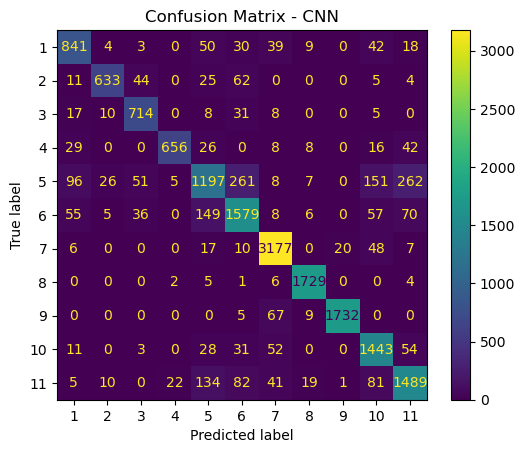

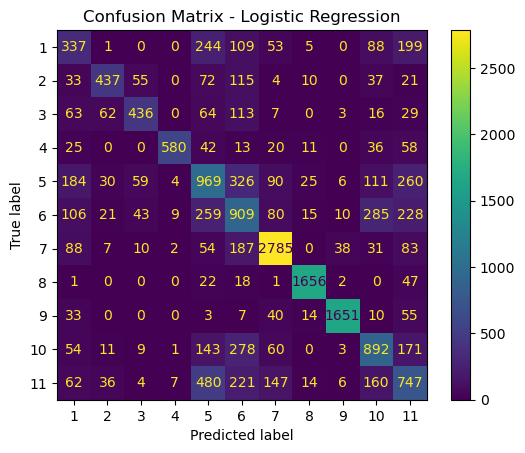

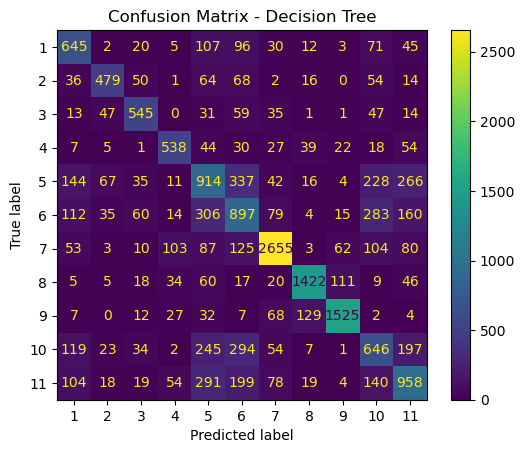

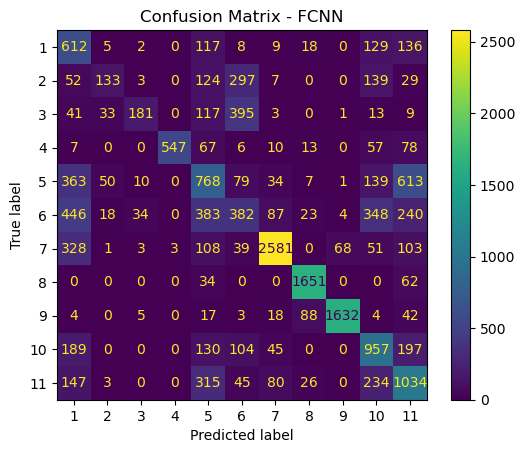

In [98]:
# Program your plots here
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def plot_confusion_matrix(model_name, y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot()
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

class_labels = [str(i) for i in range(1,12)]

# CNN Confusion Matrix
cnn_predictions = []
cnn_labels = []
with torch.no_grad():
    CNN_model = CNN()
    checkpoint_CNN = torch.load('best_model_CNN.pth', weights_only=True)
    CNN_model.load_state_dict(checkpoint_CNN['model_state_dict'])
    CNN_model.eval()
    test_images = torch.tensor(dataset['test_images'].astype(np.float32) / 255.0).unsqueeze(1)
    test_dataset = TensorDataset(test_images, test_labels)
    test_loader_CNN = DataLoader(test_dataset, batch_size=64, shuffle=False)
    for images, labels in test_loader_CNN:
        images = images.to(device)
        labels = labels.to(device)
        outputs = CNN_model(images)
        _, predicted = torch.max(outputs, 1)
        cnn_predictions.extend(predicted.cpu().numpy())
        cnn_labels.extend(labels.cpu().numpy())
plot_confusion_matrix("CNN", cnn_labels, cnn_predictions, class_labels)

# Logistic Regression Confusion Matrix
checkpoint_logis = joblib.load('best_logistic_regression_model.pkl')
best_model_logis = checkpoint_logis['best_model']
test_images = dataset['test_images'].reshape(dataset['test_images'].shape[0], -1).astype(np.float32) / 255.0
test_images_pca = pca.transform(test_images)
test_predictions_logis = best_model_logis.predict(test_images_pca)
test_labels = dataset['test_labels'].flatten().astype(np.int64)
plot_confusion_matrix("Logistic Regression", test_labels, test_predictions_logis, class_labels)

# Decision Tree Confusion Matrix
checkpoint_decision_T = joblib.load('best_Decision Tree Classifier_model.pkl')
best_model_decision_T = checkpoint_decision_T['best_model']
test_predictions_decision_T = best_model_decision_T.predict(test_images)
test_labels = dataset['test_labels'].flatten().astype(np.int64)
plot_confusion_matrix("Decision Tree", test_labels, test_predictions_decision_T, class_labels)

# FCNN Confusion Matrix
fcnn_predictions = []
fcnn_labels = []
with torch.no_grad():
    FCNN_model = FullyConnectedNN()
    checkpoint_FCNN = torch.load('best_model_FCNN.pth', weights_only=True)
    FCNN_model.load_state_dict(checkpoint_FCNN['model_state_dict'])
    FCNN_model.eval()
    test_images = torch.tensor(dataset['test_images'].reshape(dataset['test_images'].shape[0], -1).astype(np.float32) / 255.0)
    test_labels = torch.tensor(dataset['test_labels'].flatten().astype(np.int64))
    test_dataset = TensorDataset(test_images, test_labels)
    test_loader_FCNN = DataLoader(test_dataset, batch_size=64, shuffle=False)
    for images, labels in test_loader_FCNN:
        images = images.view(images.size(0), -1).to(device)  
        labels = labels.to(device)
        outputs = FCNN_model(images)
        _, predicted = torch.max(outputs, 1)
        fcnn_predictions.extend(predicted.cpu().numpy())
        fcnn_labels.extend(labels.cpu().numpy())
plot_confusion_matrix("FCNN", fcnn_labels, fcnn_predictions, class_labels)

c) Now provide a **short discussion and analysis** of your results and any conclusions that you can make from the data.

*Write your answer in this markdown cell*

Convolutional Neural Network (CNN): CNN demonstrates the highest accuracy among the models, as evident from the well-defined diagonal in its confusion matrix. 

Logistic Regression: Logistic Regression performs the worst among the models, with the confusion matrix showing significant misclassification.

Decision Tree: The Decision Tree model exhibits moderate performance, with some clear misclassification patterns visible in its confusion matrix.

Fully Connected Neural Network (FCNN): The confusion matrix shows more off-diagonal elements compared to CNN, indicating higher misclassification rates. This highlights the limitation of FCNN in capturing spatial features in image data.

## 2. Denoising Autoencoder [17 marks]

### The CIFAR-10 dataset
In this assignment, we will work on the CIFAR-10 dataset collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton from the University of Toronto. This dataset consists of 60,000  colour images in 10 classes, with 6,000 images per class. Each sample is a 3-channel colour images of 32x32 pixels in size. There are 50,000 training images and 10,000 test images.

### 2.1: Data loading and manipulation [3 marks]

**2.1a** Using the PyTorch Torchvision datasets, download both the training and test data of the CIFAR-10 dataset. If you find it more convenient, you may download them from a different source the Torchvision. For an example, please see the lab on Convolutional Neural Networks.

In [99]:
# Code your solution here
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.ToTensor(),  
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  
])

train_dataset_cifar = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testda_dataset_cifar = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader_cifar = DataLoader(train_dataset_cifar, batch_size=64, shuffle=False)
test_loader_cifar = DataLoader(testda_dataset_cifar, batch_size=64, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


**2.1b** Add random noise to all training and test data to generate noisy dataset, e.g., by torch.randn(), with a scaling factor scale, e.g., original image + scale * torch.randn(), and normalise/standardise the pixel values to the original range, e.g., using torch.clip(). You may choose any scale value between 0.2 and 0.5.

There are 2 ways to apply these random transformations using the latest version of Torchvision. Either are acceptable as long as the correct noise is applied.
- In the newer verions, PyTorch has introduced v2 transformations which includes directly a `GaussianNoise([mean, sigma, clip])` transformation (please see [here](https://pytorch.org/vision/master/transforms.html#color) for more details).
- If you are not using the vv2 transformations then random transformation can be applied using a `Lambda` [transform](https://pytorch.org/vision/stable/transforms.html) when composing the load data transform, which looks a little like this:  
`transforms.Lambda(lambda x: x + ..... )`

Note: Before generating the random noise, you MUST set the random seed to your UCard number XXXXXXXXX for reproducibility, e.g., using torch.manual_seed(). This seed needs to be used for all remaining code if there is randomness, for reproducibility.

You may want to create separate dataloaders for the noisy and clear images but make sure they are **not shuffling the data** so that correct pair of images are being given as input and desired output.

In [100]:
# Code your solution here
import torch
from torchvision.datasets import CIFAR10
torch.manual_seed(1838679)
scale = 0.3 
transform_clean = transforms.Compose([
    transforms.ToTensor()
])
transform_noisy = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: torch.clamp(x + scale * torch.randn_like(x), 0, 1))  
])
train_dataset_clean = CIFAR10(root='./data', train=True, download=True, transform=transform_clean)
train_dataset_noisy = CIFAR10(root='./data', train=True, download=True, transform=transform_noisy)
test_dataset_clean = CIFAR10(root='./data', train=False, download=True, transform=transform_clean)
test_dataset_noisy = CIFAR10(root='./data', train=False, download=True, transform=transform_noisy)

batch_size = 64  
train_loader_clean = DataLoader(train_dataset_clean, batch_size=batch_size, shuffle=False)
test_loader_clean = DataLoader(test_dataset_clean, batch_size=batch_size, shuffle=False)

train_loader_noisy = DataLoader(train_dataset_noisy, batch_size=batch_size, shuffle=False)
test_loader_noisy = DataLoader(test_dataset_noisy, batch_size=batch_size, shuffle=False)



Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


**2.1c** Show 10 pairs of original and noisy images.

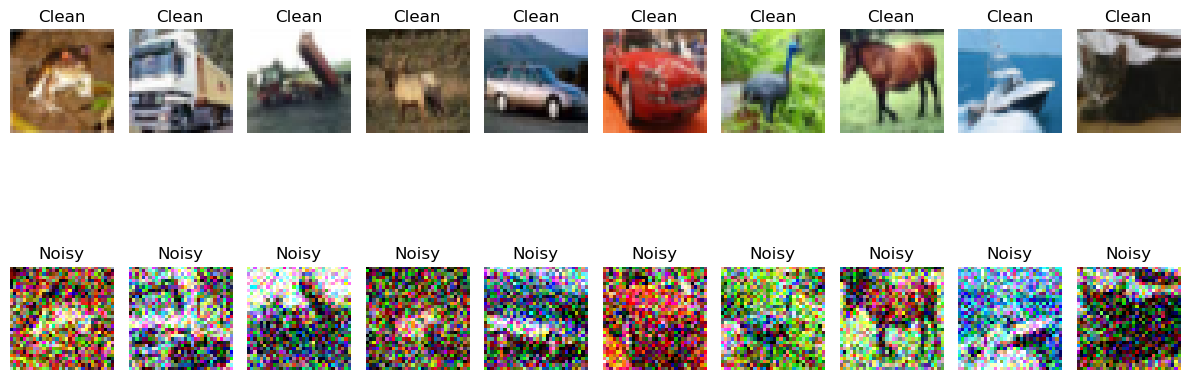

In [101]:
# Code your solution here
def show_image_pairs(clean_loader, noisy_loader, num_pairs=10):
    clean_iter = iter(clean_loader)
    noisy_iter = iter(noisy_loader)

    clean_images, _ = next(clean_iter)
    noisy_images, _ = next(noisy_iter)

    plt.figure(figsize=(12, 6))
    for i in range(num_pairs):
        # Clean image
        plt.subplot(2, num_pairs, i + 1)
        clean_img = clean_images[i] 
        npimg = clean_img.numpy()
        plt.imshow(np.transpose(npimg, (1, 2, 0)))
        plt.axis("off")
        plt.title("Clean")

        # Noisy image
        plt.subplot(2, num_pairs, i + 1 + num_pairs)
        noisy_img = noisy_images[i]
        npimg = noisy_img.numpy()
        plt.imshow(np.transpose(npimg, (1, 2, 0)))
        plt.axis("off")
        plt.title("Noisy")

    plt.tight_layout()
    plt.show()

show_image_pairs(train_loader_clean, train_loader_noisy, num_pairs=10)


### 2.2 Applying a Denoising Autoencoder to the modified CIFAR10 [10 marks]

This question uses both the original and noisy CIFAR-10 datasets (all 10 classes).
Read about denoising autoencoders at [Wikipedia](https://en.wikipedia.org/wiki/Autoencoder) and this [short introduction](https://towardsdatascience.com/denoising-autoencoders-explained-dbb82467fc2) or any other sources you like.

**2.2a** Modify the autoencoder architecture so that it takes colour images as input (i.e., 3 input channels).

In [102]:
# Code your solution here

class DenoisingAutoencoder(nn.Module):
    def __init__(self):
        super(DenoisingAutoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),  
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),  
            nn.ReLU(),
            nn.MaxPool2d(2, 2)  
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),  
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, kernel_size=3, stride=2, padding=1, output_padding=1),  
            nn.Sigmoid()  
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded





**2.2b** Training: feed the noisy training images as input to the autoencoder defined above; use a loss function that computes the reconstruction error between the output of the autoencoder and the respective original images.



In [103]:
# Code your solution here
num_epochs = 20
loss_function = nn.MSELoss()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
autoencoder = DenoisingAutoencoder().to(device)
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)
autoencoder.train()  
for epoch in range(num_epochs):
    running_loss = 0.0

    for noisy_imgs, clean_imgs in zip(train_loader_noisy, train_loader_clean):
        noisy_imgs, _ = noisy_imgs  
        clean_imgs, _ = clean_imgs  
        noisy_imgs, clean_imgs = noisy_imgs.to(device), clean_imgs.to(device)
        
        # Forward pass
        reconstructed_imgs = autoencoder(noisy_imgs)  
        loss = loss_function(reconstructed_imgs, clean_imgs)  
        
        # Backward pass and optimization
        optimizer.zero_grad()  
        loss.backward()  
        optimizer.step()  
        
        running_loss += loss.item()

    
    avg_loss = running_loss / len(train_loader_noisy)
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}")

# Save the trained model
torch.save(autoencoder.state_dict(), "denoising_autoencoder.pth")
print("Training completed and model saved.")

Epoch [1/20], Loss: 0.0112
Epoch [2/20], Loss: 0.0080
Epoch [3/20], Loss: 0.0075
Epoch [4/20], Loss: 0.0072
Epoch [5/20], Loss: 0.0071
Epoch [6/20], Loss: 0.0069
Epoch [7/20], Loss: 0.0068
Epoch [8/20], Loss: 0.0067
Epoch [9/20], Loss: 0.0067
Epoch [10/20], Loss: 0.0066
Epoch [11/20], Loss: 0.0066
Epoch [12/20], Loss: 0.0065
Epoch [13/20], Loss: 0.0065
Epoch [14/20], Loss: 0.0065
Epoch [15/20], Loss: 0.0064
Epoch [16/20], Loss: 0.0064
Epoch [17/20], Loss: 0.0064
Epoch [18/20], Loss: 0.0064
Epoch [19/20], Loss: 0.0064
Epoch [20/20], Loss: 0.0063
Training completed and model saved.


**2.2c** Testing: evaluate the autoencoder trained in 2.2b on the test datasets (feed noisy images in and compute reconstruction errors on original clean images. Find the worst denoised 20 images (those with the largest reconstruction errors) in the test set and show them in pairs with the original images (40 images to show in total).

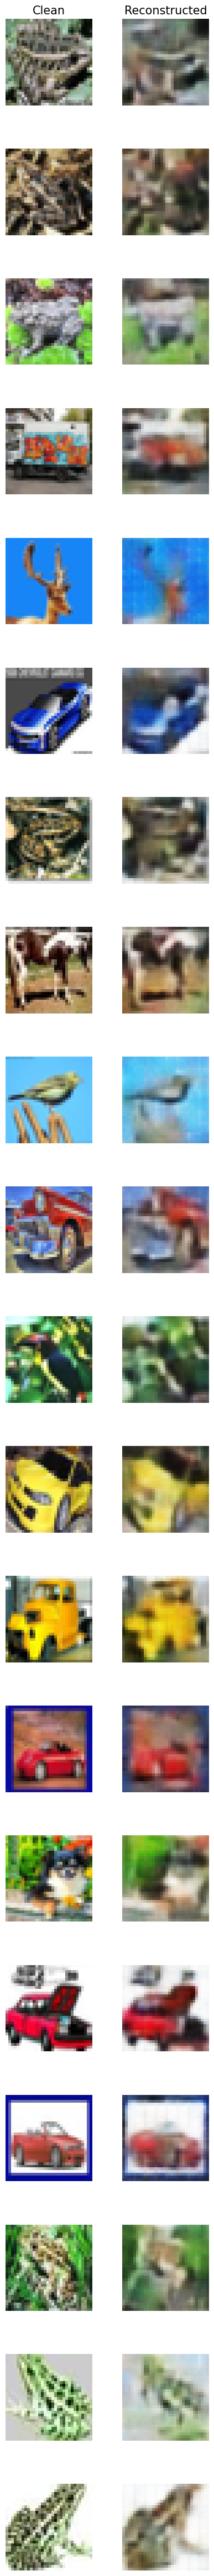

In [105]:
# Code your solution here
torch.manual_seed(1838679)
reconstruction_errors = []
clean_images_list = []
reconstructed_images_list = []
autoencoder.eval()
with torch.no_grad():
    for noisy_imgs, clean_imgs in zip(test_loader_noisy, test_loader_clean):
        noisy_imgs, _ = noisy_imgs  
        clean_imgs, _ = clean_imgs
        noisy_imgs, clean_imgs = noisy_imgs.to(device), clean_imgs.to(device)
        
        # Reconstruct images
        reconstructed_imgs = autoencoder(noisy_imgs)
        
        # Compute reconstruction errors
        loss = ((reconstructed_imgs - clean_imgs) ** 2).mean(dim=(1, 2, 3))
        reconstruction_errors.extend(loss.cpu().numpy())
        clean_images_list.extend(clean_imgs.cpu())
        reconstructed_images_list.extend(reconstructed_imgs.cpu())

# Convert lists to numpy arrays for sorting
reconstruction_errors = np.array(reconstruction_errors)
clean_images = torch.stack(clean_images_list)
reconstructed_images = torch.stack(reconstructed_images_list)

# Find the indices of the 20 worst images
worst_indices = np.argsort(reconstruction_errors)[-20:]

# Visualize the 20 worst noisy and clean image pairs
def visualize_worst_images_column(worst_indices, clean_images, reconstructed_images):
    num_images = len(worst_indices)  
    rows = num_images  
    cols = 2  

    plt.figure(figsize=(5, rows * 3))  

    for i, idx in enumerate(worst_indices):

        # Clean Image
        plt.subplot(rows, cols, i * cols + 1)
        img = clean_images[idx] 
        npimg = img.numpy()
        plt.imshow(np.transpose(npimg, (1, 2, 0)))
        plt.axis("off")
        if i == 0:
            plt.title("Clean", fontsize=15)

        # Reconstructed Image
        plt.subplot(rows, cols, i * cols + 2)
        img = reconstructed_images[idx] 
        npimg = img.numpy()
        plt.imshow(np.transpose(npimg, (1, 2, 0)))
        plt.axis("off")
        if i == 0:
            plt.title("Reconstructed", fontsize=15)

    plt.subplots_adjust(wspace=0.2, hspace=0.5)  
    plt.show()


visualize_worst_images_column(worst_indices, clean_images, reconstructed_images)


**2.2d** Choose at least **two** hyperparameters (e.g learning rate) to vary. Study at least **three** different choices for each hyperparameter. When varying one hyperparameter, all the other hyperparameters can be fixed. **Plot** the reconstruction error with respect to each of these hyper-parameters.

In [ ]:
# Code your solution here

# Hyperparameter choices
learning_rates = [0.0001, 0.001, 0.01]
batch_sizes = [16, 32, 64]
epochs = 15 

reconstruction_errors_lr = []
reconstruction_errors_bs = []


def compute_reconstruction_error(autoencoder, loader_noisy,loader_clean, device):
    autoencoder.eval()
    total_loss = 0.0
    count = 0
    with torch.no_grad():
        for noisy_imgs, clean_imgs in zip(loader_noisy,loader_clean):
            noisy_imgs, _ = noisy_imgs  
            clean_imgs, _ = clean_imgs
            noisy_imgs, clean_imgs = noisy_imgs.to(device), clean_imgs.to(device)
            reconstructed_imgs = autoencoder(noisy_imgs)
            loss = ((reconstructed_imgs - clean_imgs) ** 2).mean().item()  
            total_loss += loss * noisy_imgs.size(0)  
            count += noisy_imgs.size(0)  
    return total_loss / count

autoencoder = DenoisingAutoencoder().to(device)

# Vary learning rate while keeping batch size fixed
fixed_batch_size = 32
for lr in learning_rates:
    print(f"Training with learning rate = {lr}")
    optimizer = optim.Adam(autoencoder.parameters(), lr=lr)
    loss_function = nn.MSELoss()

    train_loader_noisy = DataLoader(train_dataset_noisy, batch_size=fixed_batch_size, shuffle=False)
    train_loader_clean = DataLoader(train_dataset_clean, batch_size=fixed_batch_size, shuffle=False)

    # Training loop
    for epoch in range(epochs):
        autoencoder.train()
        for noisy_imgs, clean_imgs in zip(train_loader_noisy, train_loader_clean):
            noisy_imgs, _ = noisy_imgs  
            clean_imgs, _ = clean_imgs
            noisy_imgs, clean_imgs = noisy_imgs.to(device), clean_imgs.to(device)
            optimizer.zero_grad()
            reconstructed_imgs = autoencoder(noisy_imgs)
            loss = loss_function(reconstructed_imgs, clean_imgs)
            loss.backward()
            optimizer.step()
    test_loader_noisy = DataLoader(test_dataset_noisy, batch_size=fixed_batch_size, shuffle=False)
    test_loader_clean = DataLoader(test_dataset_clean, batch_size=fixed_batch_size, shuffle=False)
    # Evaluate reconstruction error
    error = compute_reconstruction_error(autoencoder, test_loader_noisy,test_loader_clean, device)
    reconstruction_errors_lr.append(error)
print(reconstruction_errors_lr)
# Vary batch size while keeping learning rate fixed

autoencoder = DenoisingAutoencoder().to(device)

fixed_learning_rate = 0.01
for bs in batch_sizes:
    print(f"Training with batch size = {bs}")
    optimizer = optim.Adam(autoencoder.parameters(), lr=fixed_learning_rate)
    loss_function = nn.MSELoss()
    train_loader_noisy = DataLoader(train_dataset_noisy, batch_size=bs, shuffle=False)
    train_loader_clean = DataLoader(train_dataset_clean, batch_size=bs, shuffle=False)
    
    # Training loop
    for epoch in range(epochs):
        autoencoder.train()
        for noisy_imgs, clean_imgs in zip(train_loader_noisy, train_loader_clean):
            noisy_imgs, _ = noisy_imgs  
            clean_imgs, _ = clean_imgs
            noisy_imgs, clean_imgs = noisy_imgs.to(device), clean_imgs.to(device)
            optimizer.zero_grad()
            reconstructed_imgs = autoencoder(noisy_imgs)
            loss = loss_function(reconstructed_imgs, clean_imgs)
            loss.backward()
            optimizer.step()
    test_loader_noisy = DataLoader(test_dataset_noisy, batch_size=bs, shuffle=False)
    test_loader_clean = DataLoader(test_dataset_clean, batch_size=bs, shuffle=False)
    # Evaluate reconstruction error
    error = compute_reconstruction_error(autoencoder, test_loader_noisy,test_loader_clean, device)
    reconstruction_errors_bs.append(error)
print(reconstruction_errors_bs)




Training with learning rate = 0.0001
Training with learning rate = 0.001
Training with learning rate = 0.01
[0.006856486815214157, 0.006106965281814336, 0.006464537577331066]
Training with batch size = 16
Training with batch size = 32
Training with batch size = 64
[0.0069334737114608285, 0.0068657011337578296, 0.006741110390424729]


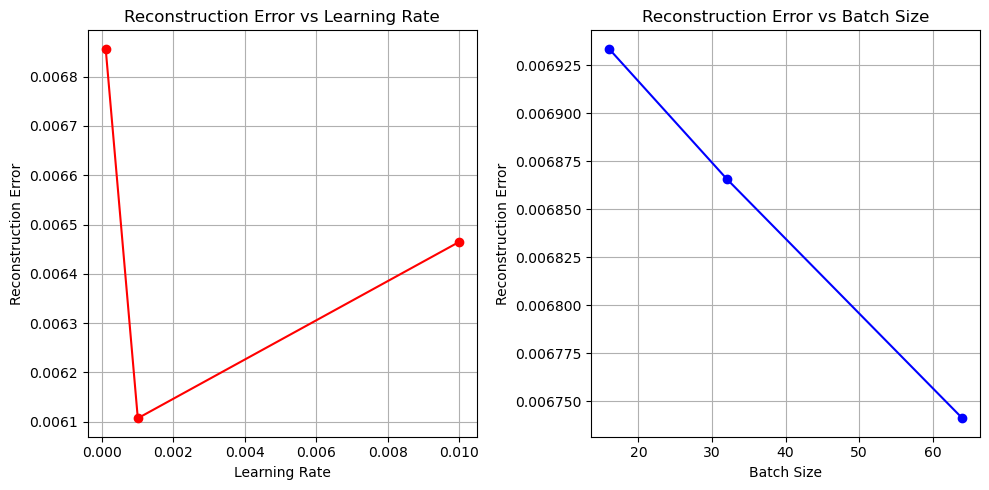

In [104]:
# Plotting reconstruction errors
plt.figure(figsize=(10, 5))

# Plot for learning rates
plt.subplot(1, 2, 1)
plt.plot(learning_rates, reconstruction_errors_lr, marker='o', color='red')
plt.title('Reconstruction Error vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Reconstruction Error')
plt.grid()

# Plot for batch sizes
plt.subplot(1, 2, 2)
plt.plot(batch_sizes, reconstruction_errors_bs, marker='o', color='blue')
plt.title('Reconstruction Error vs Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Reconstruction Error')
plt.grid()

plt.tight_layout()
plt.show()

### 2.3 Discussion of results [4 marks]
**2.3a** Describe at least **two** interesting relevant observations from the evaluation results above.

Write your solution in this markdown 

Learning Rate vs Reconstruction Error: From the graph on the left, it is evident that the learning rate significantly impacts the reconstruction error of the model. A learning rate of 0.001 produces the lowest reconstruction error, indicating that it facilitates effective optimization. However, higher learning rates (0.01) lead to an increase in reconstruction error, possibly due to overshooting during gradient updates. Similarly, a very small learning rate (0.0001) results in suboptimal performance as the model converges too slowly.

Batch Size vs Reconstruction Error: The graph on the right demonstrates that increasing the batch size generally decreases the reconstruction error. This behavior can be attributed to the stable gradient estimates obtained from larger batch sizes, which improve model performance.